In [1]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from statsmodels.tsa.stattools import adfuller

In [2]:
start = datetime(2002, 1, 1)
end = datetime(2021, 9, 29)

In [3]:
agys = web.DataReader('AGYS', 'yahoo', start=start, end=end)
agys

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-01-02,13.500000,12.350000,12.680000,13.480000,320700.0,12.426826
2002-01-03,14.230000,13.515000,13.515000,14.230000,145500.0,13.118228
2002-01-04,14.100000,13.500000,14.000000,13.850000,338400.0,12.767921
2002-01-07,13.920000,13.610000,13.650000,13.920000,83000.0,12.832448
2002-01-08,13.950000,13.480000,13.830000,13.900000,127100.0,12.814013
...,...,...,...,...,...,...
2021-09-23,54.080002,51.770000,52.820000,53.840000,44316.0,53.840000
2021-09-24,53.930000,52.549999,53.189999,52.639999,50054.0,52.639999
2021-09-27,53.720001,52.389999,52.720001,53.360001,44010.0,53.360001


In [4]:
returns = 100 * agys.Close.pct_change().dropna()
returns

Date
2002-01-03    5.563798
2002-01-04   -2.670409
2002-01-07    0.505413
2002-01-08   -0.143681
2002-01-09   -2.230212
                ...   
2021-09-23    2.748089
2021-09-24   -2.228828
2021-09-27    1.367783
2021-09-28   -4.591456
2021-09-29    1.237480
Name: Close, Length: 4970, dtype: float64

Text(0.5, 1.0, 'AGYS Returns')

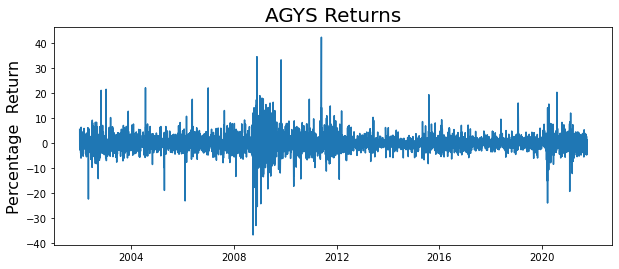

In [5]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Percentage  Return', fontsize=16)
plt.title('AGYS Returns', fontsize=20)

In [6]:
result = adfuller(returns)
print('AGYS Returns ADF Test')
print("ADF Statistic: %f" %result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

AGYS Returns ADF Test
ADF Statistic: -14.224724
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


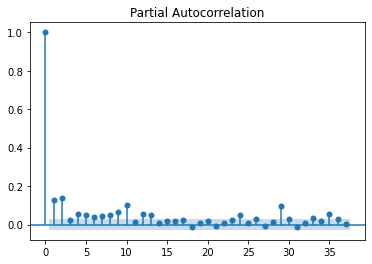

In [7]:
plot_pacf(returns**2)
plt.show()

# Splitting Data

In [8]:
train, test= returns[0:int(len(returns)*0.80)], returns[int(len(returns)*0.80):]

In [9]:
print(len(train))
print(len(test))

3976
994


In [12]:
rolling_predictions = []
for i in range(len(test)):
    train = returns[:-(len(test)-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.residual_variance.values[-1,:][0]))

C:\Users\wafa\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\wafa\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\wafa\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message.

In [15]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[3976:])
rolling_predictions

Date
2017-10-18    2.056246
2017-10-19    2.002334
2017-10-20    2.015063
2017-10-23    1.963770
2017-10-24    1.919046
                ...   
2021-09-23    2.937708
2021-09-24    2.933060
2021-09-27    2.909138
2021-09-28    2.821417
2021-09-29    3.070547
Length: 994, dtype: float64

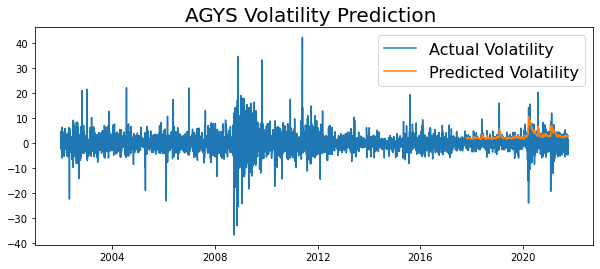

In [70]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns)
preds, = plt.plot(rolling_predictions)
plt.title('AGYS Volatility Prediction ', fontsize=20)
plt.legend(['Actual Volatility', 'Predicted Volatility'], fontsize=16)

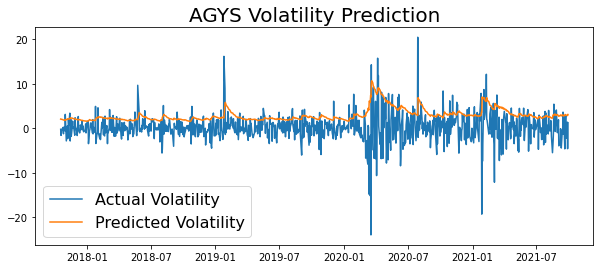

In [71]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-994:])
preds, = plt.plot(rolling_predictions)
plt.title('AGYS Volatility Prediction', fontsize=20)
plt.legend(['Actual Volatility', 'Predicted Volatility'], fontsize=16)

In [72]:
returns[-994:]

Date
2017-10-18   -0.240382
2017-10-19   -1.606424
2017-10-20   -0.244896
2017-10-23   -0.409167
2017-10-24    0.164334
                ...   
2021-09-23    2.748089
2021-09-24   -2.228828
2021-09-27    1.367783
2021-09-28   -4.591456
2021-09-29    1.237480
Name: Close, Length: 994, dtype: float64

In [73]:
test

Date
2017-10-18   -0.240382
2017-10-19   -1.606424
2017-10-20   -0.244896
2017-10-23   -0.409167
2017-10-24    0.164334
                ...   
2021-09-23    2.748089
2021-09-24   -2.228828
2021-09-27    1.367783
2021-09-28   -4.591456
2021-09-29    1.237480
Name: Close, Length: 994, dtype: float64

In [74]:
rolling_predictions

Date
2017-10-18    2.056964
2017-10-19    1.999920
2017-10-20    2.014618
2017-10-23    1.960462
2017-10-24    1.913589
                ...   
2021-09-23    2.944512
2021-09-24    2.939136
2021-09-27    2.913870
2021-09-28    2.821390
2021-09-29    3.083659
Length: 994, dtype: float64

In [75]:
mse = mean_squared_error(returns[-994:], rolling_predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(returns[-994:], rolling_predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(returns[-994:], rolling_predictions))
print('RMSE: '+str(rmse))

MSE: 18.060507124356583
MAE: 3.144571701084595
RMSE: 4.249765537574583
